In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM
scaler = MinMaxScaler()

In [ ]:
df = pd.read_excel("S&P BSE SENSEX.xlsx",index_col='Date',parse_dates=True)
df_for_date=df[int(len(df['Realised'])*0.7):].reset_index()

In [ ]:
def df_to_X_y(window_size,test,scaled_test_input):
  X=[]
  for i in range(len(test)):
    row = [[a] for a in scaled_test_input[i:i+window_size]]
    X.append(row)
  return np.array(X)

In [ ]:
n_inputs = [21,63,84,126,189,252]
n_neurons = [14,42,56,84,126,168]
epochs=[1,3,5,7,10,15]
dropouts=[0,0.2,0.4]
losses=['mse','mae','huber_loss']
RMSE = []
Accuracy = []

# Hyperparameter Search

In [ ]:
from random import randrange
from numpy.random import seed

In [ ]:
for i in range (5):
  i=randrange(6)
  h=randrange(6)
  k=randrange(6)
  l=randrange(3)
  m=randrange(3)
  seed(1052023)
  n_features = 2
  n_input = n_inputs[i]
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  validation = df.iloc[int(len(df['Realised'])*0.6)-n_input:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7)-n_input:]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_validation_input = scaler.transform(validation)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  validation = df["Realised"].iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  validation = validation.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_validation_target = scaler.transform(validation)
  scaled_test_target = scaler.transform(test)
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(LSTM(n_neurons[h], activation='tanh', input_shape=(n_input, n_features)))
  model.add(Dropout(dropouts[l]))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss=losses[m], metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=epochs[k])
  X = df_to_X_y(n_input,validation,scaled_validation_input)
  X=X.reshape(len(validation), n_input, n_features)
  y_hat=model.predict(X)
  true_predictions = scaler.inverse_transform(y_hat)
  RMSE=(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
  Accuracy=((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)
  print(f"Epoch: {epochs[k]} | Inputs: {n_inputs[i]} | Nodes: {n_neurons[h]} | Dropout: {dropouts[l]} | Loss: {losses[m]}")
  print(f"RMSE: {RMSE} | Accuracy: {Accuracy}")

Epoch 1/5
124/124 [==============================] - 11s 9ms/step - loss: 0.0027 - accuracy: 2.5323e-04 - mean_absolute_error: 0.0453
Epoch 2/5
124/124 [==============================] - 1s 6ms/step - loss: 0.0021 - accuracy: 2.5323e-04 - mean_absolute_error: 0.0389
Epoch 3/5
124/124 [==============================] - 1s 6ms/step - loss: 0.0021 - accuracy: 2.5323e-04 - mean_absolute_error: 0.0381
Epoch 4/5
124/124 [==============================] - 1s 6ms/step - loss: 0.0019 - accuracy: 2.5323e-04 - mean_absolute_error: 0.0377
Epoch 5/5
18/18 [==============================] - 0s 3ms/step
Epoch: 5 | Inputs: 63 | Nodes: 14 | Dropout: 0.2 | Loss: huber_loss
RMSE: 0.0023754896700344964 | Accuracy: 67.56611386896037
Epoch 1/15
120/120 [==============================] - 4s 13ms/step - loss: 0.0047 - accuracy: 2.6157e-04 - mean_absolute_error: 0.0436
Epoch 2/15
120/120 [==============================] - 1s 10ms/step - loss: 0.0037 - accuracy: 2.6157e-04 - mean_absolute_error: 0.0362
Epoch 3/

In [ ]:
for i in range (5):
  i=randrange(6)
  h=randrange(6)
  k=randrange(6)
  l=randrange(3)
  m=randrange(3)
  seed(1052023)
  n_features = 2
  n_input = n_inputs[i]
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  validation = df.iloc[int(len(df['Realised'])*0.6)-n_input:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7)-n_input:]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_validation_input = scaler.transform(validation)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  validation = df["Realised"].iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  validation = validation.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_validation_target = scaler.transform(validation)
  scaled_test_target = scaler.transform(test)
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(LSTM(n_neurons[h], activation='tanh', input_shape=(n_input, n_features)))
  model.add(Dropout(dropouts[l]))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss=losses[m], metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=epochs[k])
  X = df_to_X_y(n_input,validation,scaled_validation_input)
  X=X.reshape(len(validation), n_input, n_features)
  y_hat=model.predict(X)
  true_predictions = scaler.inverse_transform(y_hat)
  RMSE=(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
  Accuracy=((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)
  print(f"Epoch: {epochs[k]} | Inputs: {n_inputs[i]} | Nodes: {n_neurons[h]} | Dropout: {dropouts[l]} | Loss: {losses[m]}")
  print(f"RMSE: {RMSE} | Accuracy: {Accuracy}")

Epoch 1/10
122/122 [==============================] - 4s 12ms/step - loss: 0.0022 - accuracy: 2.5733e-04 - mean_absolute_error: 0.0404
Epoch 2/10
122/122 [==============================] - 1s 8ms/step - loss: 0.0020 - accuracy: 2.5733e-04 - mean_absolute_error: 0.0389
Epoch 3/10
122/122 [==============================] - 1s 8ms/step - loss: 0.0018 - accuracy: 2.5733e-04 - mean_absolute_error: 0.0366
Epoch 4/10
122/122 [==============================] - 1s 8ms/step - loss: 0.0017 - accuracy: 2.5733e-04 - mean_absolute_error: 0.0356
Epoch 5/10
122/122 [==============================] - 1s 8ms/step - loss: 0.0017 - accuracy: 2.5733e-04 - mean_absolute_error: 0.0354
Epoch 6/10
122/122 [==============================] - 1s 8ms/step - loss: 0.0017 - accuracy: 2.5733e-04 - mean_absolute_error: 0.0357
Epoch 7/10
122/122 [==============================] - 2s 12ms/step - loss: 0.0017 - accuracy: 2.5733e-04 - mean_absolute_error: 0.0351
Epoch 8/10
122/122 [==============================] - 1s 9ms

In [ ]:
for i in range (5):
  i=randrange(6)
  h=randrange(6)
  k=randrange(6)
  l=randrange(3)
  m=randrange(3)
  seed(1052023)
  n_features = 2
  n_input = n_inputs[i]
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  validation = df.iloc[int(len(df['Realised'])*0.6)-n_input:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7)-n_input:]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_validation_input = scaler.transform(validation)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  validation = df["Realised"].iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  validation = validation.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_validation_target = scaler.transform(validation)
  scaled_test_target = scaler.transform(test)
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(LSTM(n_neurons[h], activation='tanh', input_shape=(n_input, n_features)))
  model.add(Dropout(dropouts[l]))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss=losses[m], metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=epochs[k])
  X = df_to_X_y(n_input,validation,scaled_validation_input)
  X=X.reshape(len(validation), n_input, n_features)
  y_hat=model.predict(X)
  true_predictions = scaler.inverse_transform(y_hat)
  RMSE=(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
  Accuracy=((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)
  print(f"Epoch: {epochs[k]} | Inputs: {n_inputs[i]} | Nodes: {n_neurons[h]} | Dropout: {dropouts[l]} | Loss: {losses[m]}")
  print(f"RMSE: {RMSE} | Accuracy: {Accuracy}")

Epoch 1/10
125/125 [==============================] - 3s 5ms/step - loss: 0.0395 - accuracy: 2.5056e-04 - mean_absolute_error: 0.0395
Epoch 2/10
125/125 [==============================] - 1s 5ms/step - loss: 0.0358 - accuracy: 2.5056e-04 - mean_absolute_error: 0.0358
Epoch 3/10
125/125 [==============================] - 1s 6ms/step - loss: 0.0351 - accuracy: 2.5056e-04 - mean_absolute_error: 0.0351
Epoch 4/10
125/125 [==============================] - 1s 5ms/step - loss: 0.0351 - accuracy: 2.5056e-04 - mean_absolute_error: 0.0351
Epoch 5/10
125/125 [==============================] - 1s 5ms/step - loss: 0.0348 - accuracy: 2.5056e-04 - mean_absolute_error: 0.0348
Epoch 6/10
125/125 [==============================] - 1s 5ms/step - loss: 0.0350 - accuracy: 2.5056e-04 - mean_absolute_error: 0.0350
Epoch 7/10
125/125 [==============================] - 1s 6ms/step - loss: 0.0350 - accuracy: 2.5056e-04 - mean_absolute_error: 0.0350
Epoch 8/10
125/125 [==============================] - 1s 7ms/s

In [ ]:
for i in range (5):
  i=randrange(6)
  h=randrange(6)
  k=randrange(6)
  l=randrange(3)
  m=randrange(3)
  seed(1052023)
  n_features = 2
  n_input = n_inputs[i]
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  validation = df.iloc[int(len(df['Realised'])*0.6)-n_input:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7)-n_input:]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_validation_input = scaler.transform(validation)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  validation = df["Realised"].iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  validation = validation.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_validation_target = scaler.transform(validation)
  scaled_test_target = scaler.transform(test)
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(LSTM(n_neurons[h], activation='tanh', input_shape=(n_input, n_features)))
  model.add(Dropout(dropouts[l]))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss=losses[m], metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=epochs[k])
  X = df_to_X_y(n_input,validation,scaled_validation_input)
  X=X.reshape(len(validation), n_input, n_features)
  y_hat=model.predict(X)
  true_predictions = scaler.inverse_transform(y_hat)
  RMSE=(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
  Accuracy=((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)
  print(f"Epoch: {epochs[k]} | Inputs: {n_inputs[i]} | Nodes: {n_neurons[h]} | Dropout: {dropouts[l]} | Loss: {losses[m]}")
  print(f"RMSE: {RMSE} | Accuracy: {Accuracy}")

Epoch 1/15
118/118 [==============================] - 4s 13ms/step - loss: 0.0041 - accuracy: 2.6596e-04 - mean_absolute_error: 0.0389
Epoch 2/15
118/118 [==============================] - 1s 12ms/step - loss: 0.0036 - accuracy: 2.6596e-04 - mean_absolute_error: 0.0364
Epoch 3/15
118/118 [==============================] - 1s 12ms/step - loss: 0.0035 - accuracy: 2.6596e-04 - mean_absolute_error: 0.0355
Epoch 4/15
118/118 [==============================] - 1s 12ms/step - loss: 0.0035 - accuracy: 2.6596e-04 - mean_absolute_error: 0.0361
Epoch 5/15
118/118 [==============================] - 1s 12ms/step - loss: 0.0034 - accuracy: 2.6596e-04 - mean_absolute_error: 0.0353
Epoch 6/15
118/118 [==============================] - 2s 14ms/step - loss: 0.0033 - accuracy: 2.6596e-04 - mean_absolute_error: 0.0347
Epoch 7/15
118/118 [==============================] - 1s 12ms/step - loss: 0.0034 - accuracy: 2.6596e-04 - mean_absolute_error: 0.0354
Epoch 8/15
118/118 [==============================] - 1

Epoch: 5 | Inputs: 252 | Nodes: 84 | Dropout: 0.4 | Loss: mae
RMSE: 0.0022506889975896145 | Accuracy: 71.86140091660656

# H=1 Forecasts

In [ ]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [ ]:
for i in range (15):
  n_features = 2
  n_input = 252
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7)-n_input:]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(LSTM(84, activation='tanh', input_shape=(n_input, n_features)))
  model.add(Dropout(0.4))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss='mae', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=5)
  X = df_to_X_y(n_input,test,scaled_test_input)
  X=X.reshape(len(test), n_input, n_features)
  y_hat=model.predict(X)
  true_predictions = scaler.inverse_transform(y_hat)
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
  Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/5
118/118 [==============================] - 3s 12ms/step - loss: 0.0419 - accuracy: 2.6596e-04 - mean_absolute_error: 0.0419
Epoch 2/5
118/118 [==============================] - 1s 10ms/step - loss: 0.0359 - accuracy: 2.6596e-04 - mean_absolute_error: 0.0359
Epoch 3/5
118/118 [==============================] - 1s 10ms/step - loss: 0.0349 - accuracy: 2.6596e-04 - mean_absolute_error: 0.0349
Epoch 4/5
118/118 [==============================] - 1s 10ms/step - loss: 0.0343 - accuracy: 2.6596e-04 - mean_absolute_error: 0.0343
Epoch 5/5
54/54 [==============================] - 1s 5ms/step
Epoch 1/5
118/118 [==============================] - 4s 12ms/step - loss: 0.0379 - accuracy: 2.6596e-04 - mean_absolute_error: 0.0379
Epoch 2/5
118/118 [==============================] - 1s 11ms/step - loss: 0.0355 - accuracy: 2.6596e-04 - mean_absolute_error: 0.0355
Epoch 3/5
118/118 [==============================] - 1s 11ms/step - loss: 0.0342 - accuracy: 2.6596e-04 - mean_absolute_error: 0.0342

In [ ]:
Accuracy

[71.71660782211046,
 71.399402629436,
 69.029313873079,
 70.13636098986105,
 68.97384744636577,
 71.39296460874749,
 69.06341145451276,
 70.42141053920162,
 69.78571699990923,
 66.38584212528991,
 63.51085302793524,
 69.69681778139099,
 71.0909592450767,
 72.92564235449701,
 68.00930507258323]

In [ ]:
RMSE

[0.0025173519230985773,
 0.002501220364125509,
 0.002554643293036217,
 0.0025215991381409035,
 0.002559823407024097,
 0.002511569901393906,
 0.002552852047858468,
 0.00251015080783385,
 0.0025291832371782236,
 0.002636881719963986,
 0.002737314328567009,
 0.0025309600785676407,
 0.0025355933975850214,
 0.002530519912701744,
 0.0025855826337450576]

In [ ]:
Quasilikelihood

[0.06445486789279443,
 0.06457173704160443,
 0.0701174950849712,
 0.0672233645871167,
 0.0704637595308297,
 0.06489862309213935,
 0.07043501568803366,
 0.06693919835239079,
 0.06821008779082041,
 0.07797029277072542,
 0.08645120144816666,
 0.0686857041805706,
 0.0661161704570224,
 0.06330607314235673,
 0.07304874577241977]

In [ ]:
df_for_date=df[int(len(df['Realised'])*0.7):].reset_index()

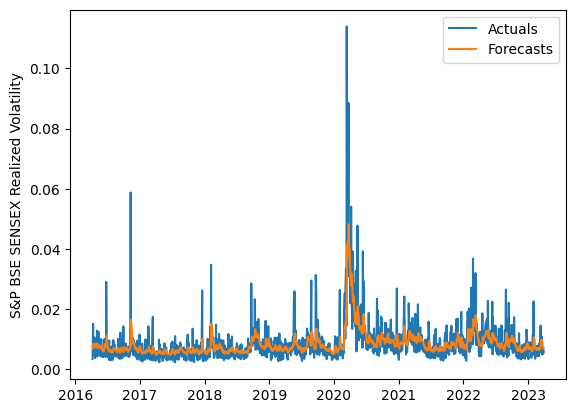

In [ ]:
# Best model
plt.plot(df_for_date["Date"], test)
plt.plot(df_for_date["Date"], true_predictions) 
plt.ylabel("S&P BSE SENSEX Realized Volatility")
plt.legend(['Actuals', 'Forecasts'])

# H=3 Forecasts

In [ ]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [ ]:
def df_to_X_y(window_size,test,scaled_test_input):
  X=[]
  y=[]
  for i in range(int(len(test)/3)):
    row = [[a] for a in scaled_test_input[i*3:(i*3)+window_size]]
    X.append(row)
  return np.array(X)

In [ ]:
for i in range (15):
  n_features = 2
  n_input = 252
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7)-n_input:]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(LSTM(84, activation='tanh', input_shape=(n_input, n_features)))
  model.add(Dropout(0.4))
  model.add(Dense(3))
  model.compile(optimizer='adam', loss='mae', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=5)
  test=test[:len(test)-len(test)%3]
  X = df_to_X_y(n_input,test,scaled_test_input)
  X=X.reshape(int(((len(test)/3))), n_input, n_features)
  y_hat=model.predict(X)
  y_hat=y_hat.reshape(len(test),1)
  true_predictions = scaler.inverse_transform(y_hat)
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
  Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/5
118/118 [==============================] - 4s 14ms/step - loss: 0.0405 - accuracy: 0.3298 - mean_absolute_error: 0.0405
Epoch 2/5
118/118 [==============================] - 1s 12ms/step - loss: 0.0362 - accuracy: 0.3468 - mean_absolute_error: 0.0362
Epoch 3/5
118/118 [==============================] - 1s 11ms/step - loss: 0.0350 - accuracy: 0.3556 - mean_absolute_error: 0.0350
Epoch 4/5
118/118 [==============================] - 1s 11ms/step - loss: 0.0341 - accuracy: 0.3117 - mean_absolute_error: 0.0341
Epoch 5/5
18/18 [==============================] - 0s 4ms/step
Epoch 1/5
118/118 [==============================] - 3s 12ms/step - loss: 0.0417 - accuracy: 0.3420 - mean_absolute_error: 0.0417
Epoch 2/5
118/118 [==============================] - 2s 13ms/step - loss: 0.0360 - accuracy: 0.3383 - mean_absolute_error: 0.0360
Epoch 3/5
118/118 [==============================] - 2s 13ms/step - loss: 0.0345 - accuracy: 0.3332 - mean_absolute_error: 0.0345
Epoch 4/5
118/118 [========

In [ ]:
RMSE

[0.0026089898849534633,
 0.00258090166011588,
 0.002623709908275231,
 0.0025807658518058937,
 0.002588206148633947,
 0.0025976315169300357,
 0.0026959429895810003,
 0.002595860168700499,
 0.002704579348058558,
 0.0026465295636824843,
 0.002634063032497013,
 0.0026091060666368414,
 0.0025969647165577847,
 0.0026113854160806143,
 0.00259223064734596]

In [ ]:
Accuracy

[68.96070710941864,
 70.36155759996032,
 70.48347519972432,
 70.50256840619808,
 70.32541451745251,
 69.55165232442677,
 66.37011280180849,
 70.33472110875174,
 66.41577185686916,
 71.72958110928505,
 72.06536556465119,
 70.15532324122638,
 71.69195327296225,
 70.26842158421091,
 70.22417271479624]

In [ ]:
Quasilikelihood

[0.07242403191975189,
 0.06954807653929224,
 0.07085952967924568,
 0.06907427657936906,
 0.06953492480827951,
 0.07105964623310837,
 0.0794224462420115,
 0.0696832412767441,
 0.07933192039414849,
 0.07009142874546626,
 0.06958446420324634,
 0.07048296066787174,
 0.06775012506104289,
 0.07008741598275507,
 0.07004024687679147]

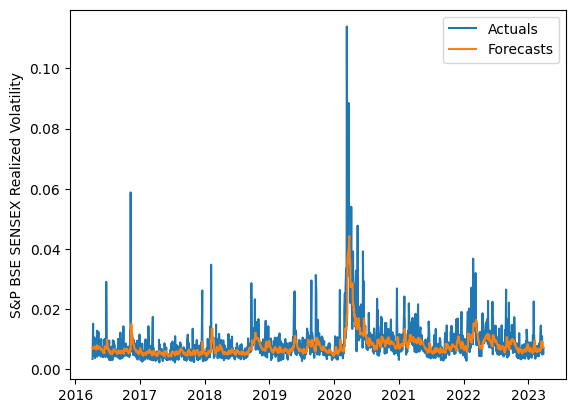

In [ ]:
# Best model
plt.plot(df_for_date["Date"][:len(test)], test)
plt.plot(df_for_date["Date"][:len(test)], true_predictions) 
plt.ylabel("S&P BSE SENSEX Realized Volatility")
plt.legend(['Actuals', 'Forecasts'])

# H=5 Forecasts

In [ ]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [ ]:
def df_to_X_y(window_size,test,scaled_test_input):
  X=[]
  y=[]
  for i in range(int(len(test)/5)):
    row = [[a] for a in scaled_test_input[i*5:(i*5)+window_size]]
    X.append(row)
  return np.array(X)

In [ ]:
for i in range (15):
  n_features = 2
  n_input = 252
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7)-n_input:]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(LSTM(84, activation='tanh', input_shape=(n_input, n_features)))
  model.add(Dropout(0.4))
  model.add(Dense(5))
  model.compile(optimizer='adam', loss='mae', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=5)
  test=test[:len(test)-len(test)%5]
  X = df_to_X_y(n_input,test,scaled_test_input)
  X=X.reshape(int(((len(test)/5))), n_input, n_features)
  y_hat=model.predict(X)
  y_hat=y_hat.reshape(len(test),1)
  true_predictions = scaler.inverse_transform(y_hat)
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
  Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/5
118/118 [==============================] - 4s 12ms/step - loss: 0.0408 - accuracy: 0.1843 - mean_absolute_error: 0.0408
Epoch 2/5
118/118 [==============================] - 1s 11ms/step - loss: 0.0364 - accuracy: 0.1771 - mean_absolute_error: 0.0364
Epoch 3/5
118/118 [==============================] - 1s 11ms/step - loss: 0.0346 - accuracy: 0.1729 - mean_absolute_error: 0.0346
Epoch 4/5
118/118 [==============================] - 2s 13ms/step - loss: 0.0346 - accuracy: 0.2000 - mean_absolute_error: 0.0346
Epoch 5/5
11/11 [==============================] - 0s 8ms/step
Epoch 1/5
118/118 [==============================] - 4s 13ms/step - loss: 0.0406 - accuracy: 0.1920 - mean_absolute_error: 0.0406
Epoch 2/5
118/118 [==============================] - 2s 15ms/step - loss: 0.0360 - accuracy: 0.1790 - mean_absolute_error: 0.0360
Epoch 3/5
118/118 [==============================] - 2s 14ms/step - loss: 0.0347 - accuracy: 0.1944 - mean_absolute_error: 0.0347
Epoch 4/5
118/118 [========

In [ ]:
RMSE

[0.00281229121736282,
 0.002780125963886461,
 0.0027108351389791537,
 0.0027451410654781615,
 0.002738893702607814,
 0.002729159506090952,
 0.00267811485878959,
 0.0030920606258260314,
 0.002695182904714473,
 0.0027757073571324634,
 0.002693134408667843,
 0.0026503902404167072,
 0.0030613072578748487,
 0.002866683575458595,
 0.0026973446910382474]

In [ ]:
Accuracy

[63.813692509544914,
 64.48834329948825,
 66.67700223169561,
 66.0224146153441,
 65.86775432191475,
 66.04451827682085,
 68.5909558050848,
 57.102749833113656,
 68.83321477299424,
 64.65978916725454,
 67.45824588207417,
 70.43630760732218,
 58.10946914932953,
 62.574457335810706,
 68.4677008493219]

In [ ]:
Quasilikelihood

[0.08899608670408805,
 0.08675610083613525,
 0.0804226631996165,
 0.082361557368656,
 0.08260054139281593,
 0.08213288492046102,
 0.07573327922000929,
 0.11111903189925118,
 0.07585727519999463,
 0.08627822281152582,
 0.07824828401233695,
 0.07181924464687578,
 0.10757706764564151,
 0.09301872002003521,
 0.07676696370125992]

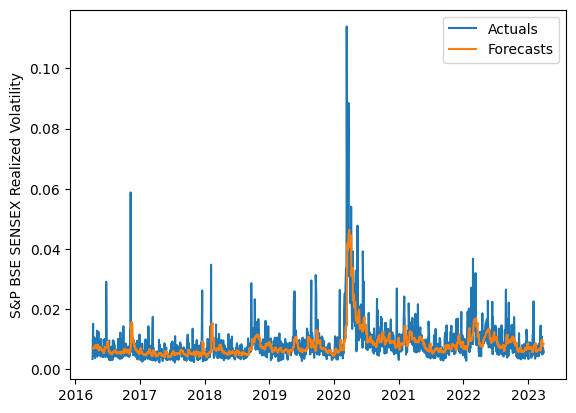

In [ ]:
# Best model
plt.plot(df_for_date["Date"][:len(test)], test)
plt.plot(df_for_date["Date"][:len(test)], true_predictions) 
plt.ylabel("S&P BSE SENSEX Realized Volatility")
plt.legend(['Actuals', 'Forecasts'])

# H=10 Forecasts

In [ ]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [ ]:
def df_to_X_y(window_size,test,scaled_test_input):
  X=[]
  y=[]
  for i in range(int(len(test)/10)):
    row = [[a] for a in scaled_test_input[i*10:(i*10)+window_size]]
    X.append(row)
  return np.array(X)

In [ ]:
for i in range (15):
  n_features = 2
  n_input = 252
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7)-n_input:]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(LSTM(84, activation='tanh', input_shape=(n_input, n_features)))
  model.add(Dropout(0.4))
  model.add(Dense(10))
  model.compile(optimizer='adam', loss='mae', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=5)
  test=test[:len(test)-len(test)%10]
  X = df_to_X_y(n_input,test,scaled_test_input)
  X=X.reshape(int(((len(test)/10))), n_input, n_features)
  y_hat=model.predict(X)
  y_hat=y_hat.reshape(len(test),1)
  true_predictions = scaler.inverse_transform(y_hat)
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
  Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/5
118/118 [==============================] - 4s 12ms/step - loss: 0.0428 - accuracy: 0.0997 - mean_absolute_error: 0.0428
Epoch 2/5
118/118 [==============================] - 1s 10ms/step - loss: 0.0363 - accuracy: 0.0907 - mean_absolute_error: 0.0363
Epoch 3/5
118/118 [==============================] - 1s 12ms/step - loss: 0.0351 - accuracy: 0.1005 - mean_absolute_error: 0.0351
Epoch 4/5
118/118 [==============================] - 2s 14ms/step - loss: 0.0349 - accuracy: 0.1056 - mean_absolute_error: 0.0349
Epoch 5/5
6/6 [==============================] - 0s 5ms/step
Epoch 1/5
118/118 [==============================] - 4s 12ms/step - loss: 0.0421 - accuracy: 0.0955 - mean_absolute_error: 0.0421
Epoch 2/5
118/118 [==============================] - 1s 11ms/step - loss: 0.0363 - accuracy: 0.1021 - mean_absolute_error: 0.0363
Epoch 3/5
118/118 [==============================] - 2s 14ms/step - loss: 0.0353 - accuracy: 0.0997 - mean_absolute_error: 0.0353
Epoch 4/5
118/118 [==========

In [ ]:
RMSE

[0.0029592492594083023,
 0.0029988312487801167,
 0.002822604489225492,
 0.002865067724259788,
 0.002802407132784571,
 0.0030591160651420248,
 0.002798233144310921,
 0.002981133019379927,
 0.0028440409541722854,
 0.002896508009165946,
 0.002840096533105922,
 0.00283853289901527,
 0.002995200997121186,
 0.0029384253379331603,
 0.002824730619010826]

In [ ]:
Accuracy

[61.946830279828056,
 63.34621206604689,
 67.3043667590364,
 64.98908478722625,
 68.53205576993071,
 59.485523152574956,
 68.5716651605954,
 62.783601041748405,
 66.14280057190435,
 64.65404441661691,
 66.38392360405523,
 66.62552785540693,
 62.77299910530151,
 62.40636975758021,
 68.18845338516186]

In [ ]:
Quasilikelihood

[0.09653417230566104,
 0.09330206334308051,
 0.08181274971594125,
 0.08777026599113179,
 0.07912613501981272,
 0.10459444915425006,
 0.07907078077316435,
 0.09480264230412734,
 0.0840915592617947,
 0.08871090065113413,
 0.08371512300693944,
 0.08368085561378047,
 0.09470576969131436,
 0.09514870230348076,
 0.08035916352331061]

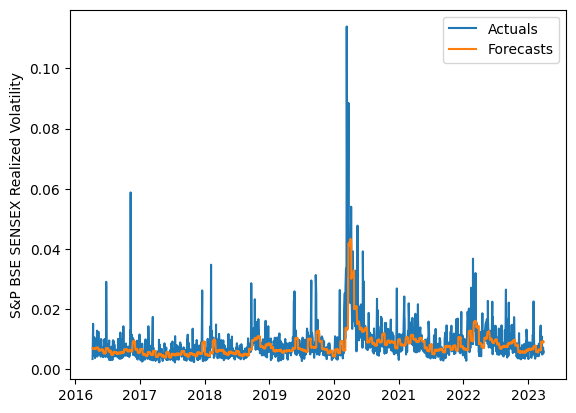

In [ ]:
# Best model
plt.plot(df_for_date["Date"][:len(test)], test)
plt.plot(df_for_date["Date"][:len(test)], true_predictions) 
plt.ylabel("S&P BSE SENSEX Realized Volatility")
plt.legend(['Actuals', 'Forecasts'])

# H=22 Forecasts

In [ ]:
RMSE = []
Accuracy = []
Quasilikelihood=[]

In [ ]:
def df_to_X_y(window_size,test,scaled_test_input):
  X=[]
  y=[]
  for i in range(int(len(test)/22)):
    row = [[a] for a in scaled_test_input[i*22:(i*22)+window_size]]
    X.append(row)
  return np.array(X)

In [ ]:
for i in range (15):
  n_features = 2
  n_input = 252
  train = df.iloc[:int(len(df['Realised'])*0.7)]
  test = df.iloc[int(len(df['Realised'])*0.7)-n_input:]
  scaler.fit(train)
  scaled_train_input = scaler.transform(train)
  scaled_test_input = scaler.transform(test)
  train = df["Realised"].iloc[:int(len(df['Realised'])*0.7)]
  test = df["Realised"].iloc[int(len(df['Realised'])*0.7):]
  train = train.array.reshape(-1, 1)
  test = test.array.reshape(-1, 1)
  scaler.fit(train)
  scaled_train_target = scaler.transform(train)
  scaled_test_target = scaler.transform(test)
  generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
  model = Sequential()
  model.add(LSTM(84, activation='tanh', input_shape=(n_input, n_features)))
  model.add(Dropout(0.4))
  model.add(Dense(22))
  model.compile(optimizer='adam', loss='mae', metrics=["accuracy", "mean_absolute_error"])
  model.fit(generator,epochs=5)
  test=test[:len(test)-len(test)%22]
  X = df_to_X_y(n_input,test,scaled_test_input)
  X=X.reshape(int(((len(test)/22))), n_input, n_features)
  y_hat=model.predict(X)
  y_hat=y_hat.reshape(len(test),1)
  true_predictions = scaler.inverse_transform(y_hat)
  RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
  Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)
  Quasilikelihood.append(np.sum(true_predictions/test-np.log(true_predictions/test)-1)/len(test))

Epoch 1/5
118/118 [==============================] - 4s 12ms/step - loss: 0.0454 - accuracy: 0.0378 - mean_absolute_error: 0.0454
Epoch 2/5
118/118 [==============================] - 1s 11ms/step - loss: 0.0367 - accuracy: 0.0500 - mean_absolute_error: 0.0367
Epoch 3/5
118/118 [==============================] - 1s 11ms/step - loss: 0.0352 - accuracy: 0.0441 - mean_absolute_error: 0.0352
Epoch 4/5
118/118 [==============================] - 1s 11ms/step - loss: 0.0345 - accuracy: 0.0423 - mean_absolute_error: 0.0345
Epoch 5/5
3/3 [==============================] - 1s 8ms/step
Epoch 1/5
118/118 [==============================] - 4s 12ms/step - loss: 0.0430 - accuracy: 0.0391 - mean_absolute_error: 0.0430
Epoch 2/5
118/118 [==============================] - 1s 11ms/step - loss: 0.0364 - accuracy: 0.0295 - mean_absolute_error: 0.0364
Epoch 3/5
118/118 [==============================] - 1s 11ms/step - loss: 0.0353 - accuracy: 0.0306 - mean_absolute_error: 0.0353
Epoch 4/5
118/118 [==========

3/3 [==============================] - 0s 7ms/step
Epoch 1/5
118/118 [==============================] - 4s 12ms/step - loss: 0.0428 - accuracy: 0.0218 - mean_absolute_error: 0.0428
Epoch 2/5
118/118 [==============================] - 2s 14ms/step - loss: 0.0361 - accuracy: 0.0351 - mean_absolute_error: 0.0361
Epoch 3/5
118/118 [==============================] - 1s 12ms/step - loss: 0.0352 - accuracy: 0.0271 - mean_absolute_error: 0.0352
Epoch 4/5
118/118 [==============================] - 1s 11ms/step - loss: 0.0342 - accuracy: 0.0194 - mean_absolute_error: 0.0342
Epoch 5/5
118/118 [==============================] - 1s 11ms/step - loss: 0.0339 - accuracy: 0.0213 - mean_absolute_error: 0.0339


3/3 [==============================] - 0s 7ms/step
Epoch 1/5
118/118 [==============================] - 4s 12ms/step - loss: 0.0425 - accuracy: 0.0689 - mean_absolute_error: 0.0425
Epoch 2/5
118/118 [==============================] - 1s 11ms/step - loss: 0.0359 - accuracy: 0.0620 - mean_absolute_error: 0.0359
Epoch 3/5
118/118 [==============================] - 1s 11ms/step - loss: 0.0348 - accuracy: 0.0907 - mean_absolute_error: 0.0348
Epoch 4/5
118/118 [==============================] - 2s 14ms/step - loss: 0.0345 - accuracy: 0.0864 - mean_absolute_error: 0.0345
Epoch 5/5
3/3 [==============================] - 0s 6ms/step
Epoch 1/5
118/118 [==============================] - 4s 12ms/step - loss: 0.0429 - accuracy: 0.0577 - mean_absolute_error: 0.0429
Epoch 2/5
118/118 [==============================] - 1s 11ms/step - loss: 0.0366 - accuracy: 0.0747 - mean_absolute_error: 0.0366
Epoch 3/5
118/118 [==============================] - 1s 11ms/step - loss: 0.0352 - accuracy: 0.0827 - mean_a

In [ ]:
RMSE

[0.0030431447002400307,
 0.0031529545466702476,
 0.002923558766281094,
 0.002956758256494468,
 0.002940511457003723,
 0.002917642778675538,
 0.0030269918882840727,
 0.0028658907881987604,
 0.002966413269859549,
 0.0029485234863383574,
 0.0031373747823290614,
 0.0029504492219333666,
 0.002943497593318828,
 0.0028691677950036924,
 0.0029978850906607437]

In [ ]:
Accuracy

[62.00783718726548,
 62.80643939170001,
 67.08154419057044,
 64.91289904963396,
 64.6247365829022,
 69.25727494412573,
 62.507337565637464,
 67.71810310277309,
 63.94796150352848,
 64.49546239031864,
 58.902193742490816,
 64.31798926007453,
 64.91872029315957,
 68.34858941213005,
 66.20635037852362]

In [ ]:
Quasilikelihood

[0.09791752841214248,
 0.09927635296317022,
 0.08640279647691405,
 0.09030499323513476,
 0.09061368435772643,
 0.08569869179910757,
 0.09696358586038276,
 0.08347570682506093,
 0.09211321834811416,
 0.09089402025353593,
 0.10702335976322613,
 0.09095010367169622,
 0.08955549829273204,
 0.08356453462173045,
 0.08998757499149243]

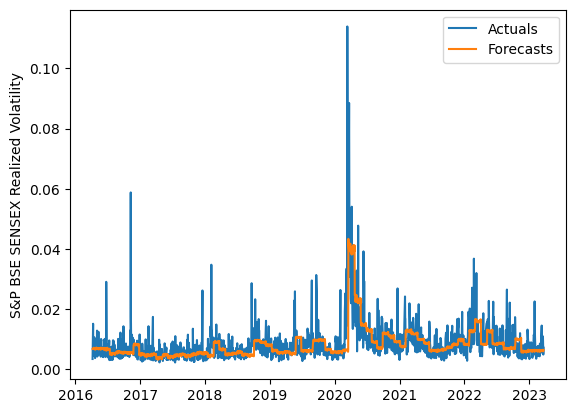

In [ ]:
# Best model
plt.plot(df_for_date["Date"][:len(test)], test)
plt.plot(df_for_date["Date"][:len(test)], true_predictions) 
plt.ylabel("S&P BSE SENSEX Realized Volatility")
plt.legend(['Actuals', 'Forecasts'])